In [1]:
import pandas as pd

In [2]:
game_states_df = pd.read_csv('game_states.csv')

In [3]:
game_states_df.head()

,MatchId,MapName,RoundNum,RoundTick,BombPlantedA,BombPlantedB,AttackerSide,VictimSide,AttackerSteamId,EventType,...,ChangeClosestDistToA_T,ChangeClosestDistToB_T,ClosestDistToA_CT,ClosestDistToB_CT,ChangeClosestDistToA_CT,ChangeClosestDistToB_CT,RoundEndReason,CTBuyType,TBuyType,WinningSide
0,DreamHack-Masters-Spring-2021-astralis-vs-comp...,de_inferno,1,30,False,False,NaN,NaN,NaN,PositionUpdate,...,0.0,0.0,19.0,15.0,0.0,0.0,TerroristsWin,Pistol,Pistol,T
1,DreamHack-Masters-Spring-2021-astralis-vs-comp...,de_inferno,1,159,False,False,NaN,NaN,NaN,PositionUpdate,...,-5.0,-5.0,17.0,14.0,-2.0,-1.0,TerroristsWin,Pistol,Pistol,T
2,DreamHack-Masters-Spring-2021-astralis-vs-comp...,de_inferno,1,288,False,False,NaN,NaN,NaN,PositionUpdate,...,-3.0,-3.0,10.0,12.0,-7.0,-2.0,TerroristsWin,Pistol,Pistol,T
3,DreamHack-Masters-Spring-2021-astralis-vs-comp...,de_inferno,1,417,False,False,NaN,NaN,NaN,PositionUpdate,...,-4.0,-4.0,8.0,17.0,-2.0,5.0,TerroristsWin,Pistol,Pistol,T
4,DreamHack-Masters-Spring-2021-astralis-vs-comp...,de_inferno,1,546,False,False,NaN,NaN,NaN,PositionUpdate,...,-2.0,-2.0,6.0,13.0,-2.0,-4.0,TerroristsWin,Pistol,Pistol,T


In [4]:
# Split the dataset into train and test (on round so that events within a round aren't split across train and test)
from sklearn.model_selection import train_test_split

round_index = ['MatchId', 'MapName', 'RoundNum']
rounds_df = game_states_df[round_index].drop_duplicates()
train, test = train_test_split(rounds_df, test_size=0.2, random_state=10)
split_df = pd.merge(train, test, how='outer', indicator=True)
split_df['dataset'] = split_df._merge.map({'left_only': 'train', 'right_only': 'test'})
split_df.drop('_merge', axis=1, inplace=True)
split_df.index = pd.MultiIndex.from_arrays(split_df[round_index].values.T)
split_df.drop(round_index, axis=1, inplace=True)
split_df.head()

,,,dataset
Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_inferno,8,train
Flashpoint-3-ClosedQualifier-dbl-poney-vs-havu-bo3,de_dust2,32,train
Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_train,4,train
Flashpoint-3-ClosedQualifier-mousesports-vs-anonymo-bo3,de_overpass,28,train
DreamHack-Masters-Spring-2021-spirit-vs-virtus-pro-bo3,de_train,26,train


In [5]:
model_parameters = ['MapName', 'RoundTick', 'TAlive', 'CTAlive', 'TTotalHp', 'CTTotalHp', 'BombPlantedA', 'BombPlantedB', 'ClosestDistToA_T', 'ClosestDistToB_T', 'ChangeClosestDistToA_T', 'ChangeClosestDistToB_T', 'ClosestDistToA_CT', 'ClosestDistToB_CT', 'ChangeClosestDistToA_CT', 'ChangeClosestDistToB_CT', 'CTBuyType', 'TBuyType', 'WinningSide']
data = game_states_df[model_parameters]
data.index = pd.MultiIndex.from_arrays(game_states_df[round_index].values.T)
data = data.merge(split_df, left_index=True, right_index=True)
data = pd.get_dummies(data, drop_first=True)
data

ralis-vs-compl... de_inferno 1      5.0   
                                                              1      5.0   
                                                              1      5.0   
                                                              1      5.0   
                                                              1      5.0   
...                                                                  ...   
Spring-Sweet-Spring-1-fiend-vs-ago-bo3             de_train   22     1.0   
                                                              22     1.0   
                                                              22     1.0   
                                                              22     1.0   
                                                              22     0.0   

                                                                  CTAlive  \
DreamHack-Masters-Spring-2021-astralis-vs-compl... de_inferno 1       5.0   
                                                              1       5.0   
                                                              1       5.0   
                                                              1       5.0   
                                                              1       5.0   
...                                                                   ...   
Spring-Sweet-Spring-1-fiend-vs-ago-bo3             de_train   22      5.0   
                                                              22      5.0   
                                                              22      5.0   
                                                              22      5.0   
                                                              22      5.0   

                                                                  TTotalHp  \
DreamHack-Masters-Spring-2021-astralis-vs-compl... de_inferno 1        5.0   
                                                              1        5.0   
                                                              1        5.0   
                                                              1        5.0   
                                                              1        5.0   
...                                                                    ...   
Spring-Sweet-Spring-1-fiend-vs-ago-bo3             de_train   22      78.0   
                                                              22      51.0   
                                                              22      51.0   
                                                              22      24.0   
                                                              22       0.0   

                                                                  CTTotalHp  \
DreamHack-Masters-Spring-2021-astralis-vs-compl... de_inferno 1         5.0   
                                                              1         5.0   
                                                              1         5.0   
                                                              1         5.0   
                                                              1         5.0   
...                                                                     ...   
Spring-Sweet-Spring-1-fiend-vs-ago-bo3             de_train   22      413.0   
                                                              22      413.0   
                                                              22      400.0   
                                                              22      400.0   
                                                              22      400.0   

                                                                  BombPlantedA  \
DreamHack-Masters-Spring-2021-astralis-vs-compl... de_inferno 1          False   
                                                              1          False   
                                                              1          False   
                                                         

In [6]:
data.isna().sum()

RoundTick                  0
TAlive                     0
CTAlive                    0
TTotalHp                   0
CTTotalHp                  0
BombPlantedA               0
BombPlantedB               0
ClosestDistToA_T           0
ClosestDistToB_T           0
ChangeClosestDistToA_T     0
ChangeClosestDistToB_T     0
ClosestDistToA_CT          0
ClosestDistToB_CT          0
ChangeClosestDistToA_CT    0
ChangeClosestDistToB_CT    0
MapName_de_inferno         0
MapName_de_mirage          0
MapName_de_nuke            0
MapName_de_overpass        0
MapName_de_train           0
MapName_de_vertigo         0
CTBuyType_Full Buy         0
CTBuyType_Full Eco         0
CTBuyType_Half Buy         0
CTBuyType_Pistol           0
TBuyType_Full Buy          0
TBuyType_Full Eco          0
TBuyType_Half Buy          0
TBuyType_Pistol            0
WinningSide_T              0
dataset_train              0
dtype: int64

In [7]:
# Min/Max Scaling for health and alive can be done across train and test
data[['TAlive', 'CTAlive']] = data[['TAlive', 'CTAlive']] / 5
data[['TTotalHp', 'CTTotalHp']] = data[['TTotalHp', 'CTTotalHp']] / 500

In [8]:
from sklearn.preprocessing import StandardScaler

features = ['RoundTick', 'ClosestDistToA_T', 'ClosestDistToB_T', 'ChangeClosestDistToA_T', 'ChangeClosestDistToB_T', 'ClosestDistToA_CT', 'ClosestDistToB_CT', 'ChangeClosestDistToA_CT', 'ChangeClosestDistToB_CT']
scaler = StandardScaler().fit(data[data.dataset_train == 1][features])
data[features] = scaler.transform(data[features])

data.describe()

,RoundTick,TAlive,CTAlive,TTotalHp,CTTotalHp,ClosestDistToA_T,ClosestDistToB_T,ChangeClosestDistToA_T,ChangeClosestDistToB_T,ClosestDistToA_CT,...,CTBuyType_Full Buy,CTBuyType_Full Eco,CTBuyType_Half Buy,CTBuyType_Pistol,TBuyType_Full Buy,TBuyType_Full Eco,TBuyType_Half Buy,TBuyType_Pistol,WinningSide_T,dataset_train
count,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,...,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000,57004.000000
mean,-0.005129,0.753498,0.758620,0.514260,0.540325,-0.012465,0.017010,-0.002477,0.002047,0.005717,...,0.692864,0.015613,0.200951,0.050102,0.757771,0.012736,0.145428,0.050102,0.504579,0.807698
std,0.994850,0.281418,0.273206,0.348116,0.350429,0.979452,1.007494,1.009154,1.039235,0.987286,...,0.461310,0.123974,0.400715,0.218157,0.428436,0.112134,0.352535,0.218157,0.499983,0.394113
min,-1.578494,0.000000,0.000000,0.000000,0.000000,-1.409073,-1.698384,-16.764755,-13.723987,-1.167738,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.843070,0.600000,0.600000,0.200000,0.200000,-0.850403,-0.784276,-0.273887,-0.234986,-0.676002,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-0.119555,0.800000,0.800000,0.570000,0.600000,-0.211923,-0.052990,0.160083,0.110886,-0.307201,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.729427,1.000000,1.000000,0.800000,0.846000,0.506368,0.678297,0.160083,0.110886,0.184534,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.061529,1.000000,1.000000,1.000000,1.000000,4.097821,3.694854,12.745219,11.524656,5.962423,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train = data[data.dataset_train == 1].drop('dataset_train', axis=1)
test = data[data.dataset_train == 0].drop('dataset_train', axis=1)
X_train = train.drop('WinningSide_T', axis=1)
y_train = train.WinningSide_T
X_test = test.drop('WinningSide_T', axis=1)
y_test = test.WinningSide_T
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(46042, 29)
(46042,)
(10962, 29)
(10962,)


## Fit Models

In [10]:
def hyperparam_search(model, model_kwargs, search_kwargs):
    m = model(**model_kwargs, )
    

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
import pickle

lr_model = LogisticRegression(max_iter=1000, solver='saga', penalty='none', random_state=10).fit(X_train, y_train)

with open('logistic.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

/home/ctshinn/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### CatBoost

In [12]:
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss

cb_params = {
    "learning_rate": [0.05, 0.1, 0.5, 1],
    "depth": [6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 9]
}


best_score = None

for lr_param in cb_params['learning_rate']:
    for depth_param in cb_params['depth']:
        for leaf_param in cb_params['l2_leaf_reg']:
            print(f'Trying hyperparameters: learning_rate ({lr_param}), depth ({depth_param}), l2_leaf_reg ({leaf_param})')

            this_model = CatBoostClassifier(
                iterations=100,
                custom_metric=['Logloss'],
                learning_rate=lr_param,
                depth=depth_param,
                l2_leaf_reg=leaf_param,
                verbose=False,
                task_type='GPU',
                devices='0:1'
            ).fit(X_train, y_train)

            this_score = -1 * log_loss(y_test, this_model.predict(X_test))
            print('Log Loss:', this_score)
            
            if best_score is None or this_score > best_score:
                best_score = this_score
                best_model = this_model

cb_model = best_model
cb_model.save_model('catboost.model')

Trying hyperparameters: learning_rate (0.05), depth (6), l2_leaf_reg (1)
Log Loss: -8.210968344395301
Trying hyperparameters: learning_rate (0.05), depth (6), l2_leaf_reg (3)
Log Loss: -7.826566275657231
Trying hyperparameters: learning_rate (0.05), depth (6), l2_leaf_reg (5)
Log Loss: -8.198361166596019
Trying hyperparameters: learning_rate (0.05), depth (6), l2_leaf_reg (7)
Log Loss: -7.848620448400167
Trying hyperparameters: learning_rate (0.05), depth (6), l2_leaf_reg (9)
Log Loss: -8.15109774424066
Trying hyperparameters: learning_rate (0.05), depth (8), l2_leaf_reg (1)
Log Loss: -8.916749139012406
Trying hyperparameters: learning_rate (0.05), depth (8), l2_leaf_reg (3)
Log Loss: -8.595369829592094
Trying hyperparameters: learning_rate (0.05), depth (8), l2_leaf_reg (5)
Log Loss: -8.53865168037121
Trying hyperparameters: learning_rate (0.05), depth (8), l2_leaf_reg (7)
Log Loss: -8.24877937405022
Trying hyperparameters: learning_rate (0.05), depth (8), l2_leaf_reg (9)
Log Loss: -8

CatBoostError: (No such file or directory) util/system/file.cpp:844: can't open "models/catboost.model" with mode WrOnly|CreateAlways|Seq (0x00000034)

In [13]:
best_model.score(X_test, y_test)

0.7733990147783252

### XGBoost

In [16]:
from xgboost import XGBClassifier

xgb_params = { 
 'max_depth': [6, 8, 10, 12, 14],
 'colsample_bytree': [0.2, 0.4, 0.6, 0.8],
 'learning_rate': [0.01, 0.05, 0.1, 0.2],
 'min_child_weight': [1, 3, 5, 7]
}

best_score = None

for depth_param in xgb_params['max_depth']:
    for cs_param in xgb_params['colsample_bytree']:
        for lr_param in xgb_params['learning_rate']:
            for mcw_param in xgb_params['min_child_weight']:
                print(f'Trying hyperparameters: max_depth ({depth_param}), colsample_bytree ({cs_param}), learning_rate ({lr_param}), min_child_weight ({mcw_param})')
                this_model = XGBClassifier(
                    n_estimators=100,
                    objective='binary:logistic',
                    tree_method='gpu_hist',
                    gpu_id=0,
                    max_depth=depth_param,
                    colsample_bytree=cs_param,
                    learning_rate=lr_param,
                    min_child_weight=mcw_param,
                    verbosity=0
                ).fit(X_train, y_train)

                this_score = -1 * log_loss(y_test, this_model.predict(X_test))
                print('Log Loss:', this_score)

                if best_score is None or this_score > best_score:
                    best_score = this_score
                    best_model = this_model


xgb_model = best_model
xgb_model.save_model('xgboost.model')

store the old behavior.
/home/ctshinn/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Log Loss: -9.058539843734431
Trying hyperparameters: max_depth (14), colsample_bytree (0.6), learning_rate (0.1), min_child_weight (3)
[18:29:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/home/ctshinn/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier 

### Evaluate For Different Loss/Scoring Metrics

In [17]:
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

def score(y_true, y_pred):
    return log_loss(y_true, y_pred), brier_score_loss(y_true, y_pred[:, 1]), roc_auc_score(y_true, y_pred[:, 1]), accuracy_score(y_true, y_pred[:, 1] >= 0.5)

In [18]:
scores = []

for name, model in zip(['LinearRegression', 'CatBoost', 'XGBoost'], [lr_model, cb_model, xgb_model]):
    y_test_pred = model.predict_proba(X_test)
    scores.append([name] + list(score(y_test, y_test_pred)))

In [19]:


scores_df = pd.DataFrame(scores, columns=['Model', 'LogLoss', 'BrierScore', 'AUC', 'Accuracy'])
scores_df

,Model,LogLoss,BrierScore,AUC,Accuracy
0,LinearRegression,0.434276,0.144309,0.879423,0.776409
1,CatBoost,0.457495,0.152519,0.865887,0.773399
2,XGBoost,0.526327,0.171505,0.885826,0.778599


In [20]:
example_round = X_test.loc['Spring-Sweet-Spring-1-fiend-vs-ago-bo3', 'de_train', 11]
round_game_states = game_states_df[(game_states_df.MatchId == 'Spring-Sweet-Spring-1-fiend-vs-ago-bo3') & (game_states_df.MapName == 'de_train') & (game_states_df.RoundNum == 11)]
round_game_states['TWinProb'] = lr_model.predict_proba(example_round)[:, 1]

<ipython-input-20-d99b9829de62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_game_states['TWinProb'] = lr_model.predict_proba(example_round)[:, 1]


In [21]:
X_test

2      1.0   
                                                              2      1.0   
                                                              2      1.0   
                                                              2      1.0   
...                                                                  ...   
Spring-Sweet-Spring-1-fiend-vs-ago-bo3             de_train   11     0.2   
                                                              11     0.2   
                                                              11     0.2   
                                                              11     0.2   
                                                              11     0.0   

                                                                  CTAlive  \
DreamHack-Masters-Spring-2021-astralis-vs-compl... de_inferno 2       1.0   
                                                              2       1.0   
                                                              2       1.0   
                                                              2       1.0   
                                                              2       1.0   
...                                                                   ...   
Spring-Sweet-Spring-1-fiend-vs-ago-bo3             de_train   11      0.6   
                                                              11      0.6   
                                                              11      0.6   
                                                              11      0.6   
                                                              11      0.6   

                                                                  TTotalHp  \
DreamHack-Masters-Spring-2021-astralis-vs-compl... de_inferno 2       0.01   
                                                              2       0.01   
                                                              2       0.01   
                                                              2       0.01   
                                                              2       0.01   
...                                                                    ...   
Spring-Sweet-Spring-1-fiend-vs-ago-bo3             de_train   11      0.20   
                                                              11      0.20   
                                                              11      0.20   
                                                              11      0.20   
                                                              11      0.00   

                                                                  CTTotalHp  \
DreamHack-Masters-Spring-2021-astralis-vs-compl... de_inferno 2       0.010   
                                                              2       0.010   
                                                              2       0.010   
                                                              2       0.010   
                                                              2       0.010   
...                                                                     ...   
Spring-Sweet-Spring-1-fiend-vs-ago-bo3             de_train   11      0.542   
                                                              11      0.542   
                                                              11      0.542   
                                                              11      0.542   
                                                              11      0.542   

                                                                  BombPlantedA  \
DreamHack-Masters-Spring-2021-astralis-vs-compl... de_inferno 2          False   
                                                              2          False   
                                                              2          False   
                                                              2          False   
                                                              2          False  

In [22]:
round_game_states

,MatchId,MapName,RoundNum,RoundTick,BombPlantedA,BombPlantedB,AttackerSide,VictimSide,AttackerSteamId,EventType,...,ChangeClosestDistToB_T,ClosestDistToA_CT,ClosestDistToB_CT,ChangeClosestDistToA_CT,ChangeClosestDistToB_CT,RoundEndReason,CTBuyType,TBuyType,WinningSide,TWinProb
55814,Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_train,11,9,False,False,NaN,NaN,NaN,PositionUpdate,...,0.0,30.0,17.0,0.0,0.0,CTWin,Full Buy,Full Buy,CT,0.355763
55815,Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_train,11,138,False,False,NaN,NaN,NaN,PositionUpdate,...,-1.0,30.0,17.0,0.0,0.0,CTWin,Full Buy,Full Buy,CT,0.359849
55816,Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_train,11,267,False,False,NaN,NaN,NaN,PositionUpdate,...,-2.0,27.0,14.0,-3.0,-3.0,CTWin,Full Buy,Full Buy,CT,0.359269
55817,Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_train,11,396,False,False,NaN,NaN,NaN,PositionUpdate,...,-1.0,21.0,13.0,-6.0,-1.0,CTWin,Full Buy,Full Buy,CT,0.353821
55818,Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_train,11,525,False,False,NaN,NaN,NaN,PositionUpdate,...,-3.0,18.0,8.0,-3.0,-5.0,CTWin,Full Buy,Full Buy,CT,0.359433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55873,Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_train,11,4395,False,False,NaN,NaN,NaN,PositionUpdate,...,0.0,2.0,13.0,0.0,1.0,CTWin,Full Buy,Full Buy,CT,0.068654
55874,Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_train,11,4524,False,False,NaN,NaN,NaN,PositionUpdate,...,0.0,1.0,13.0,-1.0,0.0,CTWin,Full Buy,Full Buy,CT,0.067959
55875,Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_train,11,4653,False,False,NaN,NaN,NaN,PositionUpdate,...,0.0,1.0,4.0,0.0,-9.0,CTWin,Full Buy,Full Buy,CT,0.061865
55876,Spring-Sweet-Spring-1-fiend-vs-ago-bo3,de_train,11,4782,False,False,NaN,NaN,NaN,PositionUpdate,...,0.0,2.0,8.0,1.0,4.0,CTWin,Full Buy,Full Buy,CT,0.062868


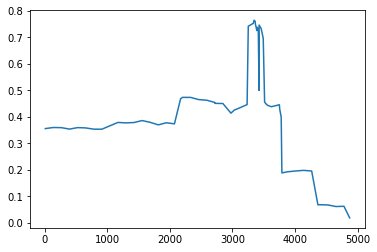

In [23]:
import matplotlib.pyplot as plt

plt.plot(round_game_states.RoundTick, round_game_states.TWinProb)

In [22]:
test = round_game_states[(round_game_states.RoundTick > 10000) & (round_game_states.RoundTick < 11000)]